<a href="https://colab.research.google.com/github/vivekverma1019/Hand-Gesture-Recognition/blob/master/hand_gesture_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### mount google drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

#####Unzipping master.zip repo

In [0]:
# import zipfile
# with zipfile.ZipFile("/content/drive/My Drive/Downloads/fast.ai course-v3 repo/master.zip","r") as zip_ref:
#     zip_ref.extractall("/content/drive/My Drive/Downloads/fast.ai course-v3 repo")

#####How to download kaggle dataset to colab :
https://medium.com/@saedhussain/google-colaboratory-and-kaggle-datasets-b57a83eb6ef8

In [0]:
# Colab library to upload files to notebook
from google.colab import files
# Install Kaggle library
!pip install -q kaggle

In [0]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
# copy kaggle.json to the right directory
!cp kaggle.json /root/.kaggle

In [0]:
# hand gesture detection dataset
# !kaggle datasets download -d gti-upm/leapgestrecog

100% 2.13G/2.13G [00:25<00:00, 123MB/s]
100% 2.13G/2.13G [00:25<00:00, 89.8MB/s]


In [0]:
# move dataset to right directory
# !mv /content/leapgestrecog.zip '/content/drive/My Drive/Downloads/fast.ai course-v3 repo'

In [0]:
# unzip dataset
import zipfile
with zipfile.ZipFile("/content/drive/My Drive/Downloads/fast.ai course-v3 repo/leapgestrecog.zip","r") as zip_ref:
    zip_ref.extractall("/content/drive/My Drive/Downloads/fast.ai course-v3 repo")

In [0]:
import os
!pwd

/content


In [0]:
import os
for i in os.listdir('/content/drive/My Drive'):
    if 'frame' in i:
        os.remove('/content/drive/My Drive/' + i)
    else:
        continue

##### preparing dataset

In [0]:
from pathlib import Path
len(sorted(Path('/content/drive/My Drive/Downloads/fast.ai course-v3 repo/leapGestRecog').glob('**/*.png')))

20000

In [0]:
path_img = '/content/drive/My Drive/Downloads/fast.ai course-v3 repo/leapGestRecog'
fnames = sorted(Path('/content/drive/My Drive/Downloads/fast.ai course-v3 repo/leapGestRecog').glob('**/*.png'))
pat = r'/\d{2}_([^/]+)/\w{5}'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, size=224, bs=64
                                  ).normalize(imagenet_stats)

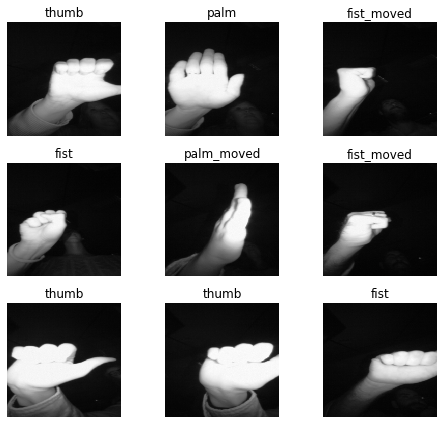

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
data.classes, data.c

(['c',
  'down',
  'fist',
  'fist_moved',
  'index',
  'l',
  'ok',
  'palm',
  'palm_moved',
  'thumb'],
 10)

##### training : resnet34

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.model

In [0]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.051627,0.002964,0.000750,02:51
1,0.007871,0.000413,0.000000,02:47
2,0.002046,0.000438,0.000000,02:45


In [0]:
learn.save('stage_1')

##### Results

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

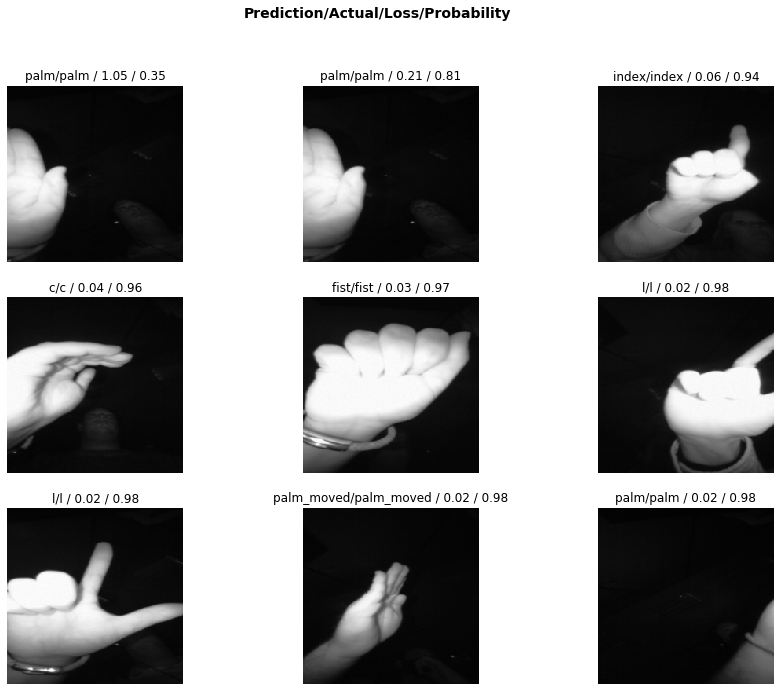

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

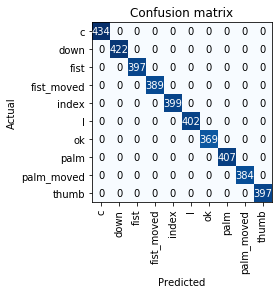

In [0]:
interp.plot_confusion_matrix()